**Exercise 1 : Use the openpyxl module to create a new workbook and add values/formulae to it**

Your task for this exercise is to create this simple calculator in Excel:

Check that your Excel workbook has been created OK (and that your calculator works!), then close your program down.

**Exercise 2 : Open an Excel workbook and read down a list of plants finding the ones not in stock**

This folder contains a workbook listing plants, some of which are not in stock:

The plants not in stock are shown with the value No in column H (as helpfully highllighted above)

Create a program called Night-scented unstocked.py to:

- Import the openpyxl module.
- Open the workbook containing the list of plants.
- Get a reference to the first sheet (called Sheet1).
- Get a reference to cell A2.

Keep going down until your program hits a blank cell (ie one whose value is None), checking the value of the cell offset 0 rows down and 7 columns to the right of the current one for each (if this is No your macro should print out this plant’s name).

**Note :** Make sure you save your program before you try running it, as if you create an infinite loop you may end up having to close down Visual Studio Code!

**Exercise 3 : Load Excel File and Write the Data**

From this file, do the following tasks :

1. Load Excel File and give path to your file
2. Perform data manipulation on the DataFrame by filtering the data where ‘Sales’ is greater than 1000.
3. Use Openpyxl to write the filtered data back to the Excel file


**Exercise 4 : Load Excel File, plot charts and Manipulate Data**
1. import the necessary libraries pandas and matplotlib.pyplot, read data from an Excel file productSales.xlsx
2. Manipulate the data by grouping it by ‘product’ and summing the sales for each product using pandas’ group by () and sum() functions
3. Export it back into a new Excel file (‘sales_report.xlsx’) using pandas’ to_excel() function
4. Save and close the file using the save() and close() methods of the ExcelWriter object.


In [1]:
pip install openpyxl pandas matplotlib

**Exercise 1 : Use the openpyxl module to create a new workbook and add values/formulae to it**

In [3]:
from openpyxl import Workbook

#Create workbook and sheet
wb = Workbook()
ws = wb.active
ws.title = "Calculator"

# Add Numbers
ws["A1"] = 10
ws["A2"] = 5

# Add Formulas
ws["A3"] = "A1+A2"
ws["A4"] = "A1-A2"
ws["A5"] = "A1*A2"
ws["A6"] = "A1/A2"

# Save the Workbook
wb.save("calculator.xlsx")

**Exercise 2 : Open an Excel workbook and read down a list of plants finding the ones not in stock**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Plants.xlsx to Plants.xlsx


In [5]:
from openpyxl import load_workbook

# Load workbook and worksheet
wb = load_workbook("Plants.xlsx")
ws = wb["Sheet1"]

# Start from row 2
row = 2
while True:
  plant_cell = ws[f"A{row}"]
  stock_status = ws.cell(row=row, column=8).value

  if plant_cell.value is None:
    break

  if stock_status == "No":
    print(f"Not in stock: {plant_cell.value}")

  row+=1

Not in stock: Honeysuckle
Not in stock: Lupin
Not in stock: Skimmia
Not in stock: Rosa
Not in stock: Gladioli


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


**Exercise 3 : Load Excel File and Write the Data**

In [6]:
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [7]:
import pandas as pd

# Load Excel File
df = pd.read_excel("data.xlsx")

# Filter rows
filtered_df = df[df["Sales"] > 1000]

# Filtered data back to Excel
with pd.ExcelWriter("sales_data_filtered.xlsx", engine="openpyxl") as writer:
  filtered_df.to_excel(writer, index=False)

**Exercise 4 : Load Excel File, plot charts and Manipulate Data**

In [8]:
uploaded = files.upload()

Saving productSales.xlsx to productSales.xlsx


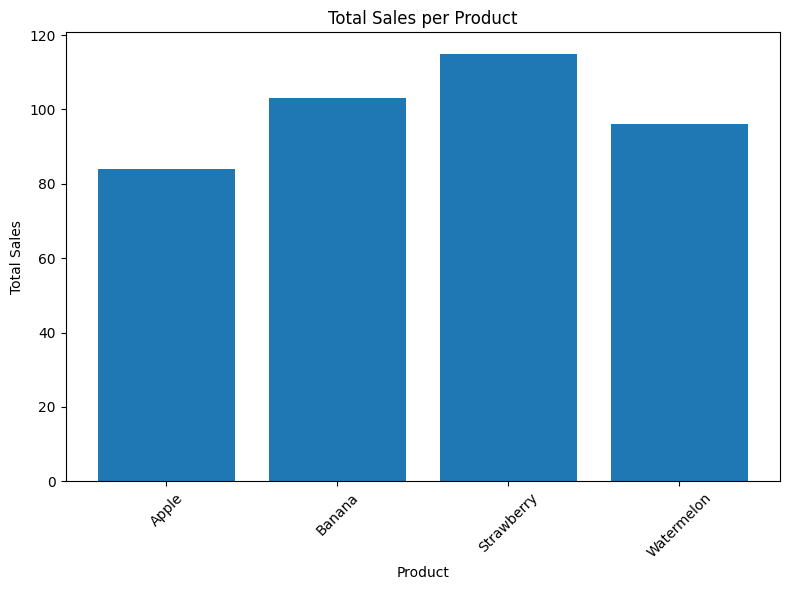

In [11]:
import matplotlib.pyplot as plt

# Load Excel File
df = pd.read_excel("productSales.xlsx")

# Group and Sum
summary = df.groupby("product")["sales"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(summary['product'], summary['sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()

# saving the file
with pd.ExcelWriter('sales_report.xlsx', engine='openpyxl') as writer:
  summary.to_excel(writer, sheet_name='Summary', index=False)